# SPGR

In [1]:
import version_control

Last run on cashlab03-deb at 2015-03-17 13:03:07.696557

Phypno Version: 71b052c80b564a062fb3738fdf00a5c692c759be

Babel==1.3, Cython==0.22, Jinja2==2.7.3, Markdown==2.6.1, MarkupSafe==0.23, Pillow==2.7.0, PyOpenGL==3.1.0, Pygments==2.0.2, Sphinx==1.3, alabaster==0.7.2, bash-kernel==0.3, beautifulsoup4==4.3.2, biopython==1.65, certifi==14.05.14, coverage==3.7.1, decorator==3.4.0, docutils==0.12, easydev==0.8.3, ipython==3.0.0, jedi==0.8.1-final0, jsonschema==2.4.0, matplotlib==1.4.3, memory-profiler==0.32, mistune==0.5.1, networkx==1.9.1, nibabel==2.0.0, nitime==0.5, nltk==3.0.2, nose==1.3.4, numpy==1.9.2, numpydoc==0.5, ordereddict==1.1, pandas==0.15.2, pandocfilters==1.2.3, pep8==1.6.2, pexpect==3.3, pockets==0.2.3, psutil==2.2.1, pycurl==7.19.5.1, pyflakes==0.8.1, pyparsing==2.0.3, pyqtgraph==0.9.10, python-dateutil==2.4.1, python-igraph==0.7.1-4, pytz==2014.10, pyzmq==14.5.0, rope-py3k==0.9.4-1, rpy2==2.5.6, scikit-learn==0.15.2, scipy==0.15.1, six==1.9.0, snowballstemmer==1.2.0, s

In [2]:
from spgr import lg

## Spindle Properties: Descriptive

### Parameters

In [3]:
hemi_subj = {'EM09': 'rh', 
             'MG17': 'rh',
             'MG33': 'lh',
             'MG37': 'lh',
             'MG61': 'lh',
             'MG63': 'rh',
             }
all_subj = sorted(hemi_subj.keys())

In [4]:
options = {'reref': 'avg',
           'resample_freq': 256,
           'hp_filter': 0.5,
           'lp_filter': 50,
           }
chan_type = ('grid', 'strip')

In [5]:
spindles_options = {'method': 'Nir2011', 
                    'frequency': (9, 16), 
                    'duration':(0.5, 2),
                    }
spindles_options.update(options)

In [6]:
STD = 10
THRESHOLD = 30

### Code

In [7]:
from os import makedirs
from os.path import join
from phypno.attr import Freesurfer
from phypno.source import Linear, Morph
from spgr.detect_spindles import get_spindles
from spgr.read_data import FS_PATH, GROUP_DIR, REC_DIR, get_chan_used_in_analysis, get_data

In [8]:
OUTPUT_DIR = join(GROUP_DIR, 'property_descriptive')
makedirs(OUTPUT_DIR, exist_ok=True)

img_dir = join(GROUP_DIR, 'images')

In [9]:
from numpy import diff, histogram, arange, argmax, median, mean, max, sum

In [10]:
def hist_diff(x, steps=1):
    v1, v0 = histogram(diff(x), arange(0, 30, steps))
    return max(v1) / sum(v1)

In [11]:
def peak_hist_diff(x, steps=1):
    v1, v0 = histogram(diff(x), arange(0, 30, steps))
    return v0[argmax(v1)]

In [12]:
all_count = []
all_freq = []
all_val = []
all_dur = []
all_hist = []
all_peak_hist = []

for subj in all_subj:
    fs = Freesurfer(join(REC_DIR, subj, FS_PATH))
    surf = fs.read_surf(hemi_subj[subj])

    data = get_data(subj, 'sleep', chan_type, **options)
    chan = data.attr['chan']
    spindles = get_spindles(subj, chan_type=chan_type, **spindles_options)
    for one_spindle in spindles.spindle:
        one_spindle['duration'] = one_spindle['end_time'] - one_spindle['start_time']
    
    dat_count = spindles.to_data('count')
    n_min = (data.number_of('trial') * (data.axis['time'][0][-1] - data.axis['time'][0][0])) / 60
    dat_count.data[0] = dat_count.data[0] / n_min
    dat_freq = spindles.to_data('peak_freq')
    dat_val = spindles.to_data('peak_val')
    dat_dur = spindles.to_data('duration')
    
    # dat_hist = spindles.to_data('peak_time', hist_diff)
    # dat_peak_hist = spindles.to_data('peak_time', peak_hist_diff)
    
    if hemi_subj[subj] == 'lh':
        for one_chan in chan.chan:
            one_chan.xyz *= (-1, 1, 1)
    surf = fs.read_surf('rh')
    l = Linear(surf, chan, std=STD, threshold=THRESHOLD)
    m = Morph(surf)

    all_count.append(m(l(dat_count)))
    all_freq.append(m(l(dat_freq)))
    all_val.append(m(l(dat_val)))
    all_dur.append(m(l(dat_dur)))
    # all_hist.append(m(l(dat_hist)))
    # all_peak_hist.append(m(l(dat_peak_hist)))

INFO:/home/gio/projects/spgr/scripts/spgr/read_data.py:Subj EM09, reading data: EM09_sleep_grid-strip_hp005_lp500_rs256.pkl
INFO:/home/gio/projects/spgr/scripts/spgr/read_data.py:EM09 analysis chan 77, with location 77
INFO:/home/gio/projects/spgr/scripts/spgr/read_data.py:Subj MG17, reading data: MG17_sleep_grid-strip_hp005_lp500_rs256.pkl
INFO:/home/gio/projects/spgr/scripts/spgr/read_data.py:MG17 analysis chan 104, with location 104
INFO:/home/gio/projects/spgr/scripts/spgr/read_data.py:Subj MG33, reading data: MG33_sleep_grid-strip_hp005_lp500_rs256.pkl
INFO:/home/gio/projects/spgr/scripts/spgr/read_data.py:MG33 analysis chan 64, with location 64
INFO:/home/gio/projects/spgr/scripts/spgr/read_data.py:Subj MG37, reading data: MG37_sleep_grid-strip_hp005_lp500_rs256.pkl
INFO:/home/gio/projects/spgr/scripts/spgr/read_data.py:MG37 analysis chan 78, with location 78
INFO:/home/gio/projects/spgr/scripts/spgr/read_data.py:Subj MG61, reading data: MG61_sleep_grid-strip_hp005_lp500_rs256.pk

### Spindle Density

In [13]:
from copy import deepcopy
from subprocess import call

from numpy import asarray, NaN, nanmean
from numpy import empty, mean, isnan

from phypno.viz import Viz3

In [14]:
from spgr.plot_spindles import plot_surf

The highest number of spindles was concentrated over prefrontal regions.
Temporal and occipital regions were relatively quiet (Fig. +[spgr_descriptive]A).

/home/gio/projects/spgr/scripts/spgr/plot_spindles.py:47: RuntimeWarning: invalid value encountered in less
  x.data[0][x.data[0] < threshold[0]] = NaN
/home/gio/tools/venv/lib/python3.4/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


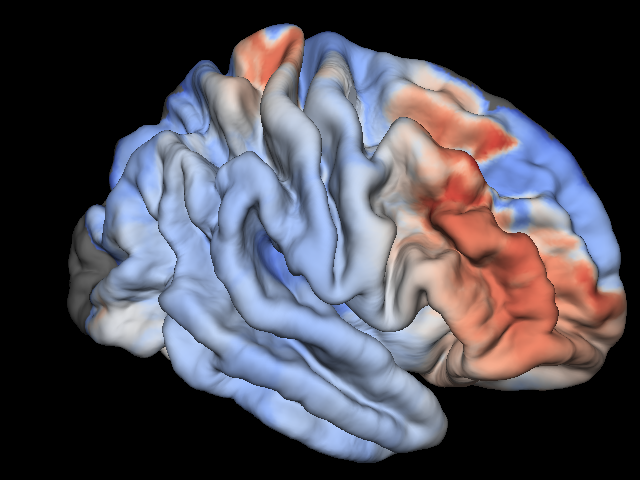

In [31]:
v = plot_surf(all_count, threshold=(0.01, None), limits=(0, 2))
v

In [ ]:
v.save(join(img_dir, 'density.png' ))

### Frequency

Spindle frequency was higher over the parietal regions (fast spindles) than over the frontal regions (slow spindle).
In addition, we found that the slowest spindles are over the occipital cortices (Fig. +[spgr_descriptive]A).

/home/gio/projects/spgr/scripts/spgr/plot_spindles.py:47: RuntimeWarning: invalid value encountered in less
  x.data[0][x.data[0] < threshold[0]] = NaN
/home/gio/projects/spgr/scripts/spgr/plot_spindles.py:49: RuntimeWarning: invalid value encountered in greater
  x.data[0][x.data[0] > threshold[1]] = NaN
/home/gio/tools/venv/lib/python3.4/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


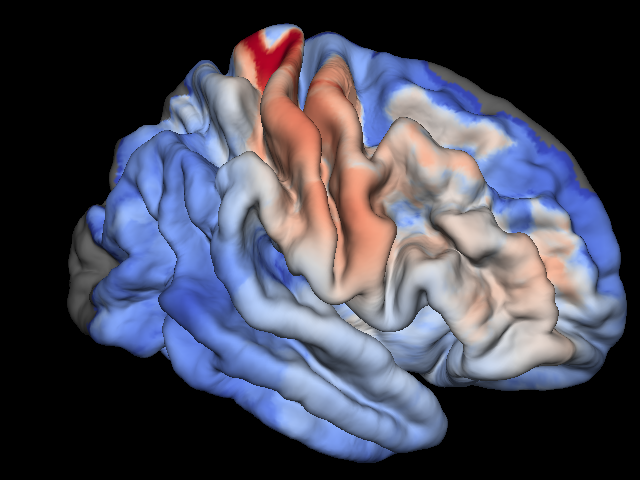

In [32]:
v = plot_surf(all_freq, threshold=spindles_options['frequency'], limits=(11, 13))
v

In [ ]:
v.save(join(img_dir, 'frequency.png' ))

/home/gio/projects/spgr/scripts/spgr/plot_spindles.py:47: RuntimeWarning: invalid value encountered in less
  x.data[0][x.data[0] < threshold[0]] = NaN
/home/gio/tools/venv/lib/python3.4/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


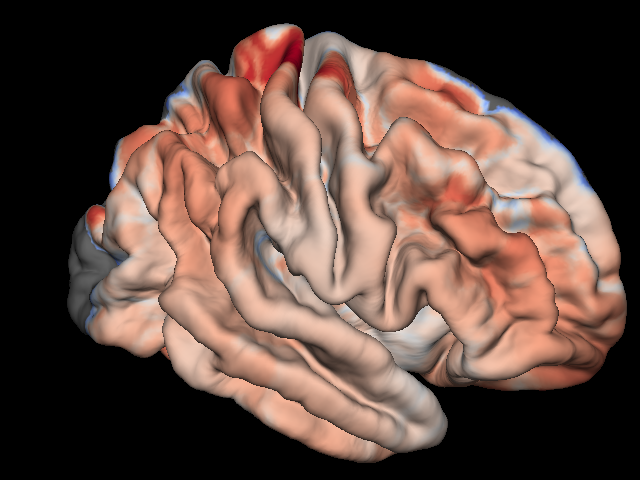

In [30]:
v = plot_surf(all_val, threshold=(0.001, None), limits=(0, 70))
v

In [ ]:
v.save(join(img_dir, 'amplitude.png' ))

/home/gio/projects/spgr/scripts/spgr/plot_spindles.py:47: RuntimeWarning: invalid value encountered in less
  x.data[0][x.data[0] < threshold[0]] = NaN
/home/gio/projects/spgr/scripts/spgr/plot_spindles.py:49: RuntimeWarning: invalid value encountered in greater
  x.data[0][x.data[0] > threshold[1]] = NaN
/home/gio/tools/venv/lib/python3.4/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


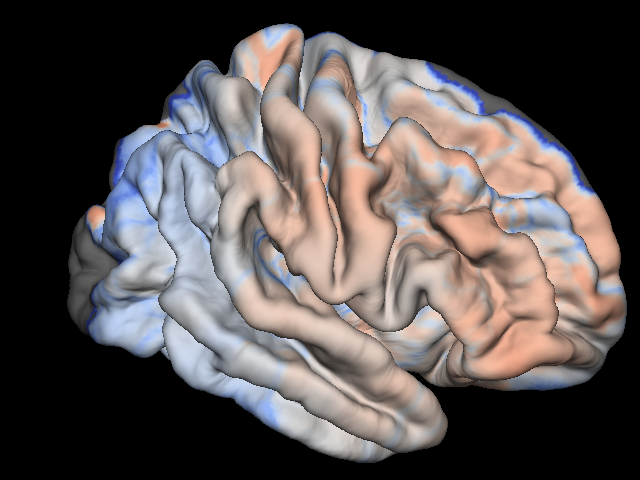

In [29]:
v = plot_surf(all_dur, threshold=(0.5, 2), limits=(1, 1.5))
v

In [ ]:
v.save(join(img_dir, 'duration.png' ))

# periodicity
v = plot_surf(all_hist, threshold=(None, None), limits=(0, .2))